#Importion of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score

# Extract the dataset

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)

In [4]:
data=pd.concat([adult.data.features,adult.data.targets],axis=1)

#Data Overview

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.shape

(48842, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#Data Cleaning

In [9]:
duplicate_rows = data[data.duplicated(keep=False)]

In [10]:
duplicate_rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [11]:
data = data.drop_duplicates(keep='first')

In [12]:
data.shape

(48813, 15)

##Check the type of data

In [13]:
print('Work Class:')
print(data['workclass'].unique())
print('\n Education:')
print(data['education'].unique())
print('\n Marital-Status:')
print(data['marital-status'].unique())
print('\n Occupation:')
print(data['occupation'].unique())
print('\n Relationship:')
print(data['relationship'].unique())
print('\n Race:')
print(data['race'].unique())
print('\n Sex:')
print(data['sex'].unique())
print('\n Native-Country:')
print(data['native-country'].unique())
print('\n Income:')
print(data['income'].unique())

Work Class:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

 Education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

 Marital-Status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

 Occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

 Relationship:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

 Race:
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

 Sex:
['Male' 'Female']

 Native-Country:
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico'

##Replace period symbol

In [14]:
data['income'] = data['income'].str.replace('.', '')

<ipython-input-14-3d56427d2f45>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['income'] = data['income'].str.replace('.', '')
<ipython-input-14-3d56427d2f45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['income'] = data['income'].str.replace('.', '')


In [15]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

##Replace '?' with NaN

In [16]:
data.replace(r'\?', np.NaN, regex=True, inplace=True)

In [17]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64


##Fill in with the mode

In [18]:
data.fillna(data.mode().iloc[0], inplace=True)

In [19]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


##Check for Coorelation between variables

<ipython-input-20-0f13bc1950dc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='copper')


<Axes: >

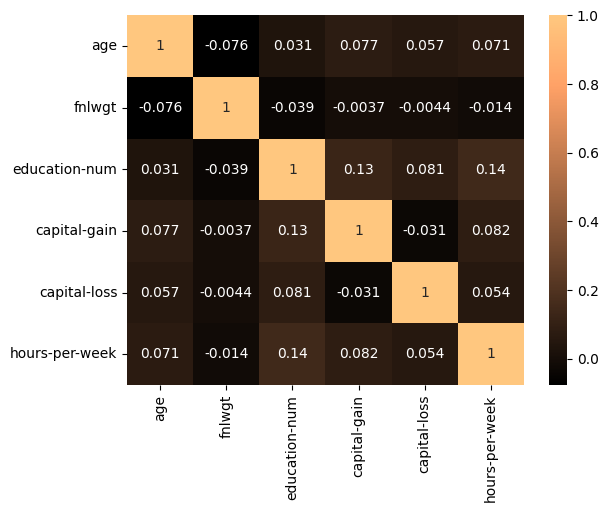

In [20]:
sns.heatmap(data.corr(),annot=True,cmap='copper')

##Removal of FNLWGT

In [21]:
data.drop(columns=['fnlwgt'], inplace=True)

##Fix the Skewness

In [22]:
data['capital-gain'] = np.log1p(data['capital-gain'])
data['capital-loss'] = np.log1p(data['capital-loss'])

## Data visualization of numerical variables

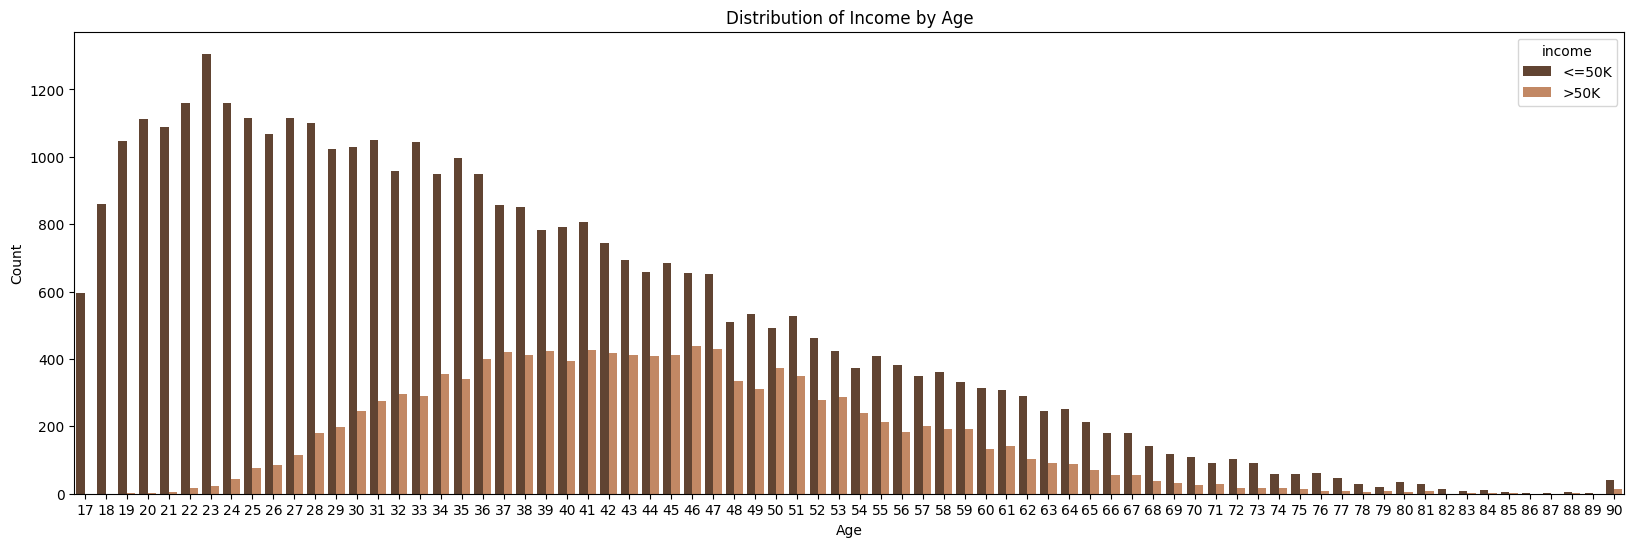

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(x="age", hue="income", data=data, palette='copper')

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Income by Age")
plt.show()


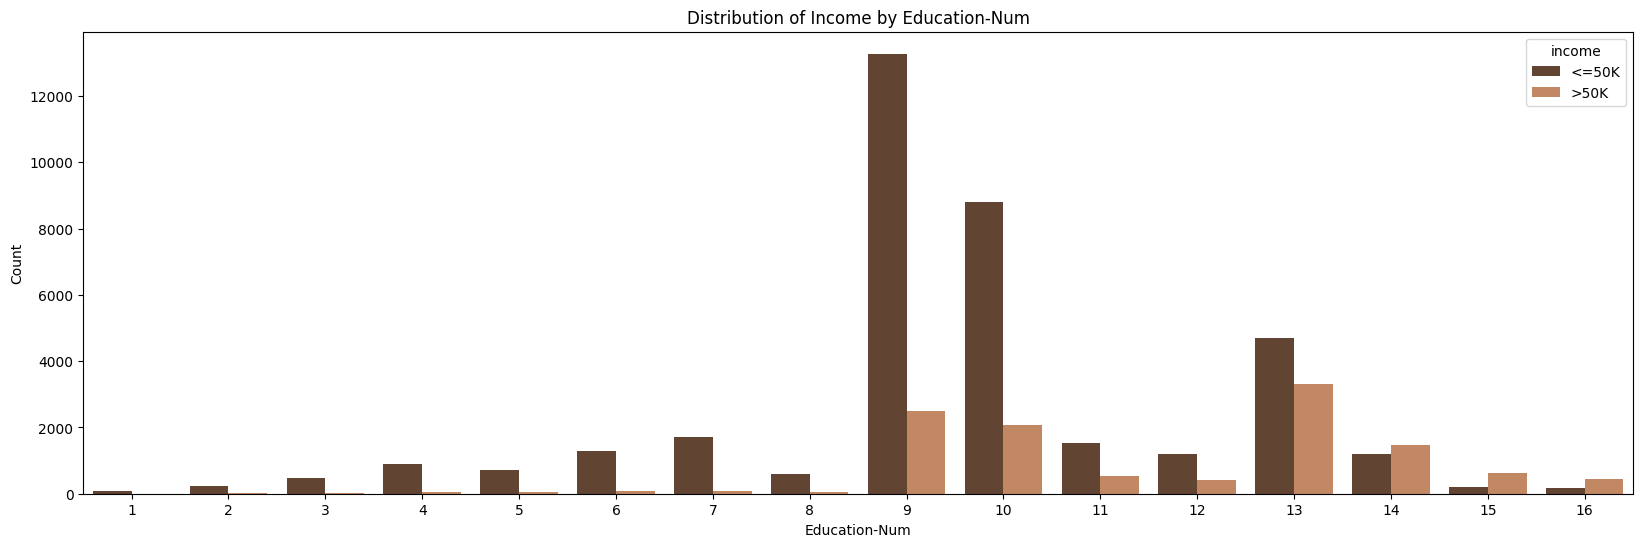

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x="education-num", hue="income", data=data, palette='copper')

plt.xlabel("Education-Num")
plt.ylabel("Count")
plt.title("Distribution of Income by Education-Num")
plt.show()


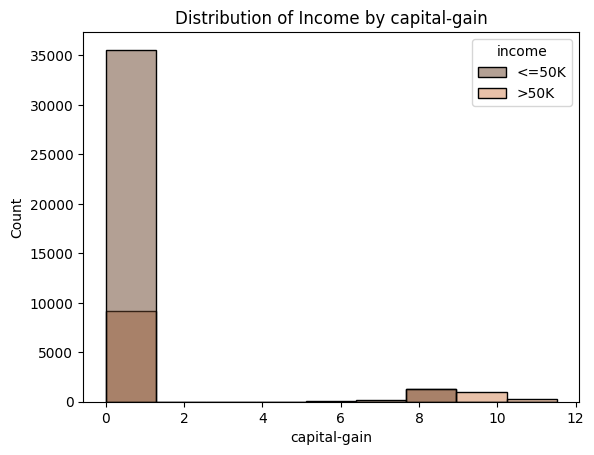

In [25]:
sns.histplot(x="capital-gain", hue="income", bins=9, data=data,palette='copper')
plt.xlabel("capital-gain")
plt.ylabel("Count")
plt.title("Distribution of Income by capital-gain")
plt.show()

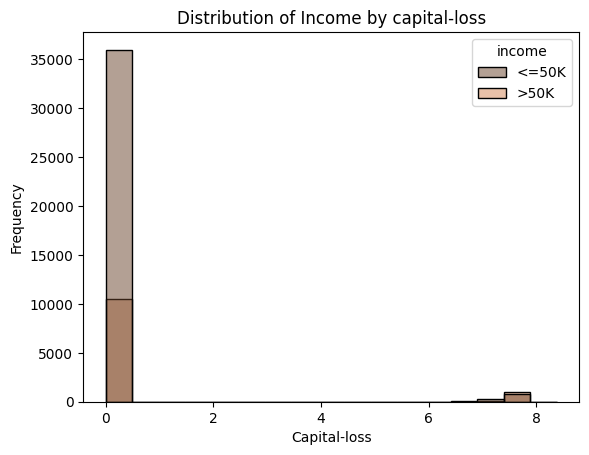

In [26]:
sns.histplot(x="capital-loss", hue="income", data=data,palette='copper')
plt.title('Distribution of Income by capital-loss')
plt.xlabel('Capital-loss')
plt.ylabel('Frequency')
plt.show()

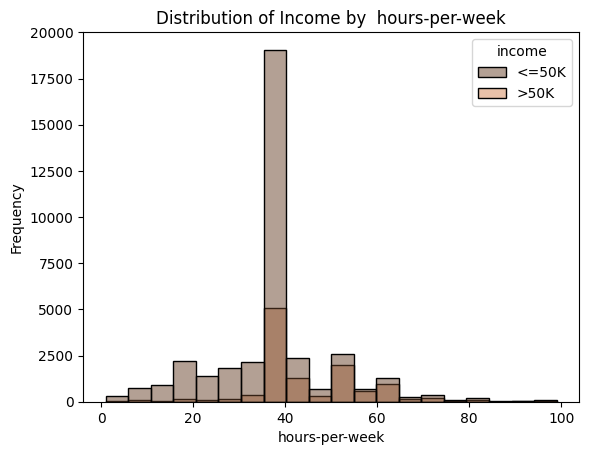

In [27]:
sns.histplot(x="hours-per-week", hue="income",bins=20, data=data,palette='copper')
plt.title('Distribution of Income by  hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('Frequency')
plt.show()

#Feature Engineering

##Data Visualization of categorical variables  & Encoding

###WorkClass


In [28]:
print(data['workclass'].value_counts())

Private             36678
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


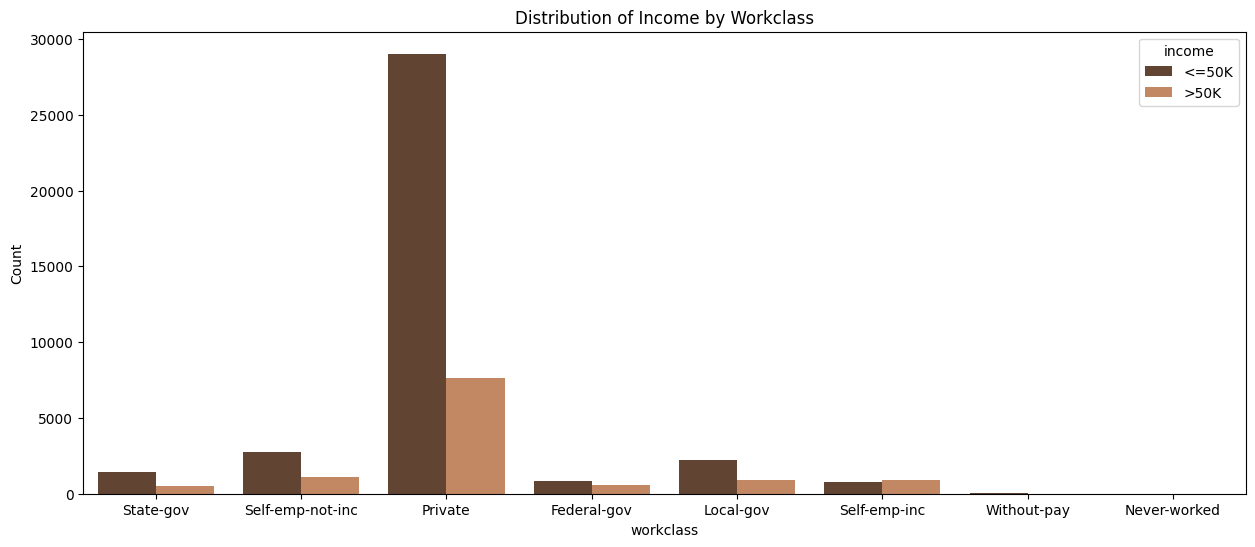

In [29]:
plt.figure(figsize=(15,6))
sns.countplot(x="workclass", hue="income", data=data,palette='copper')

plt.xlabel("workclass")
plt.ylabel("Count")
plt.title("Distribution of Income by Workclass")
plt.show()

In [30]:
workclass_mapping = {
    'Private': 1,
    'Self-emp-not-inc': 2,
    'Local-gov': 3,
    'State-gov': 4,
    'Self-emp-inc': 5,
    'Federal-gov': 6,
    'Without-pay': 7,
    'Never-worked': 8
}

In [31]:
data['workclass'] = data['workclass'].map(workclass_mapping)

In [32]:
data['workclass'].unique()

array([4, 2, 1, 6, 3, 5, 7, 8])

###Education

In [33]:
print(data['education'].value_counts())

HS-grad         15777
Some-college    10869
Bachelors        8020
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           245
Preschool          82
Name: education, dtype: int64


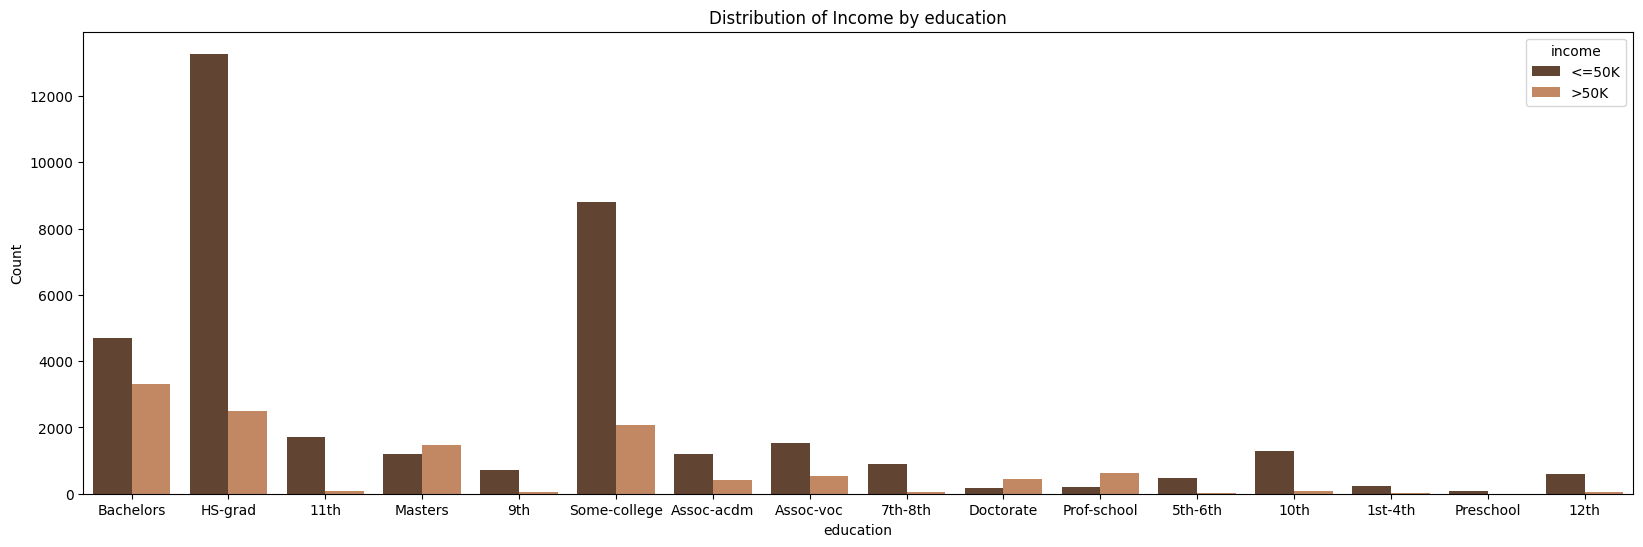

In [34]:
plt.figure(figsize=(20,6))
sns.countplot(x="education", hue="income", data=data,palette='copper')

plt.xlabel("education")
plt.ylabel("Count")
plt.title("Distribution of Income by education")
plt.show()

In [35]:
education_mapping = {
    'HS-grad': 1,
    'Some-college': 2,
    'Bachelors': 3,
    'Masters': 4,
    'Assoc-voc': 5,
    '11th': 6,
    'Assoc-acdm': 7,
    '10th': 8,
    '7th-8th': 9,
    'Prof-school': 10,
    '9th': 11,
    '12th': 12,
    'Doctorate': 13,
    '5th-6th': 14,
    '1st-4th': 15,
    'Preschool': 16
}

In [36]:
data['education'] = data['education'].map(education_mapping)

###Marital Status

In [37]:
print(data['marital-status'].value_counts())

Married-civ-spouse       22372
Never-married            16098
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


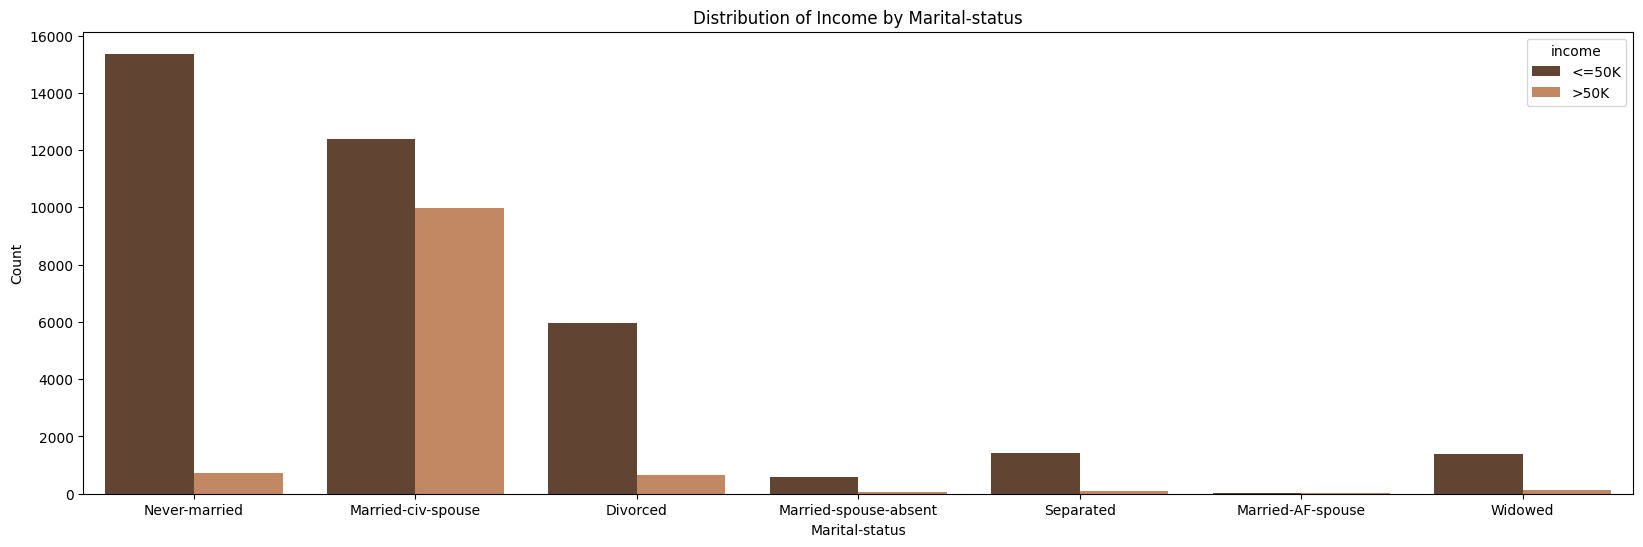

In [38]:
plt.figure(figsize=(20,6))
sns.countplot(x="marital-status", hue="income", data=data,palette='copper')

plt.xlabel("Marital-status")
plt.ylabel("Count")
plt.title("Distribution of Income by Marital-status")
plt.show()

In [39]:
marital_status_mapping = {
    'Married-civ-spouse': 0,
    'Never-married': 1,
    'Divorced': 2,
    'Widowed': 3,
    'Separated': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6
}

In [40]:
data['marital-status'] = data['marital-status'].map(marital_status_mapping)

###Occupation

In [41]:
print(data['occupation'].value_counts())

Prof-specialty       8976
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64


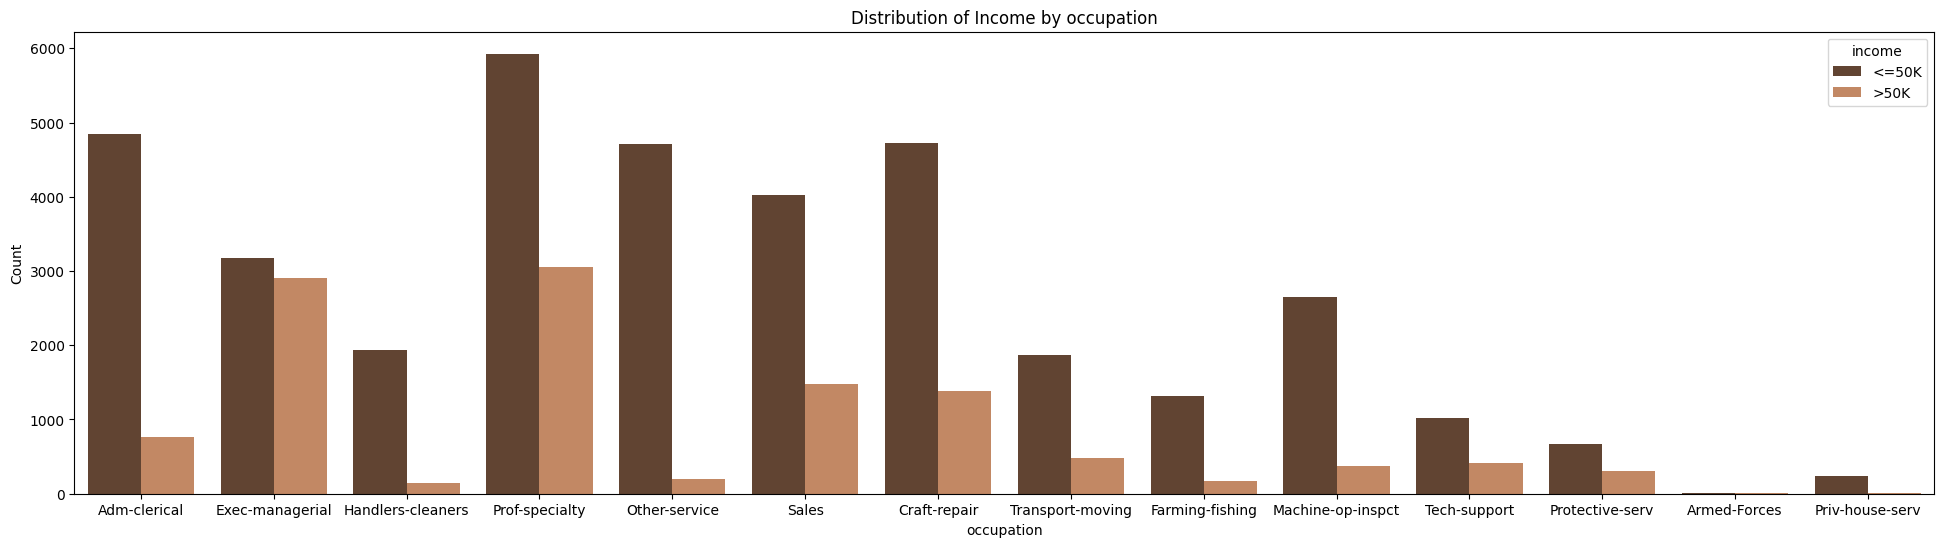

In [42]:
plt.figure(figsize=(24,6))
sns.countplot(x="occupation", hue="income", data=data,palette='copper')

plt.xlabel("occupation")
plt.ylabel("Count")
plt.title("Distribution of Income by occupation")
plt.show()

In [43]:
occupation_mapping = {
    'Prof-specialty': 0,
    'Exec-managerial': 1,
    'Craft-repair': 2,
    'Sales': 3,
    'Adm-clerical': 4,
    'Other-service': 5,
    'Machine-op-inspct': 6,
    'Transport-moving': 7,
    'Handlers-cleaners': 8,
    'Tech-support': 9,
    'Farming-fishing': 10,
    'Protective-serv': 11,
    'Priv-house-serv': 12,
    'Armed-Forces': 13
}


In [44]:
data['occupation'] = data['occupation'].map(occupation_mapping)

###Relationship

In [45]:
print(data['relationship'].value_counts())

Husband           19709
Not-in-family     12567
Own-child          7576
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64


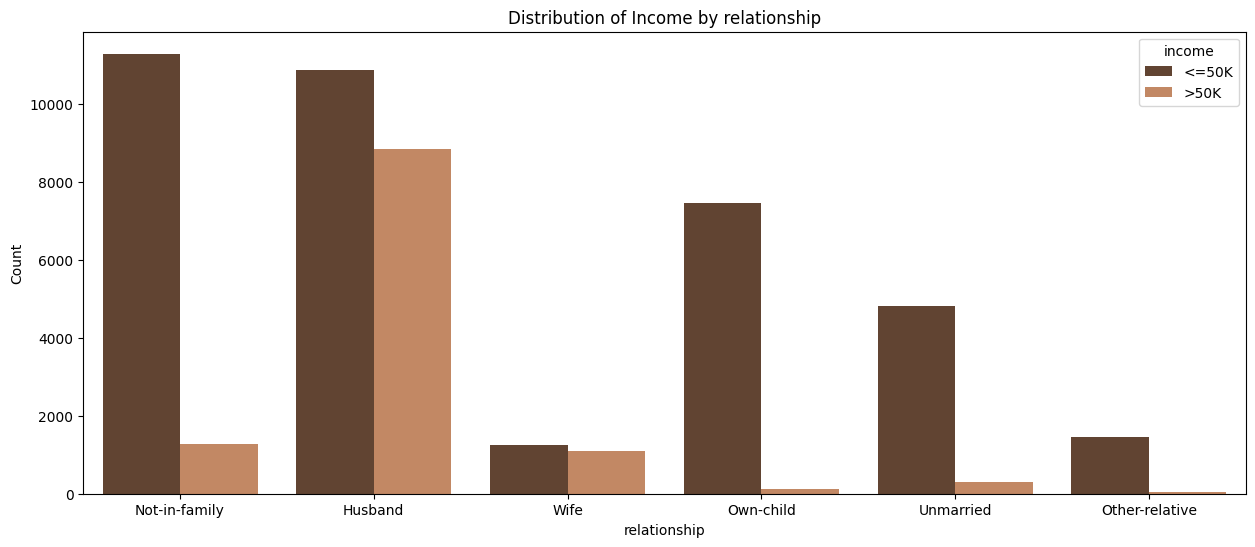

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(x="relationship", hue="income", data=data,palette='copper')

plt.xlabel("relationship")
plt.ylabel("Count")
plt.title("Distribution of Income by relationship")
plt.show()

In [47]:
relationship_mapping={
    'Husband':0,
    'Not-in-family':1,
    'Own-child':2,
    'Unmarried':3,
    'Wife':4,
    'Other-relative':5
    }

In [48]:
data['relationship'] = data['relationship'].map(relationship_mapping)

###Race

In [49]:
print(data['race'].value_counts())

White                 41736
Black                  4683
Asian-Pac-Islander     1518
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64


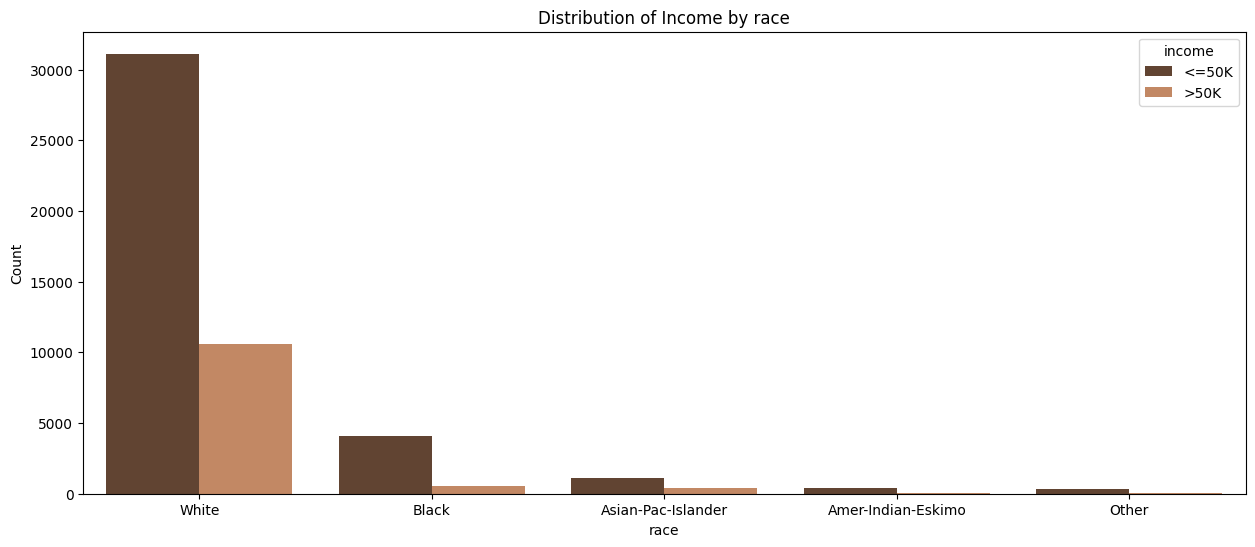

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(x="race", hue="income", data=data,palette='copper')

plt.xlabel("race")
plt.ylabel("Count")
plt.title("Distribution of Income by race")
plt.show()

In [51]:
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
}

In [52]:
data['race'] = data['race'].map(race_mapping)

###Native Country

In [53]:
print(data['native-country'].value_counts())

United-States                 44666
Mexico                          947
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

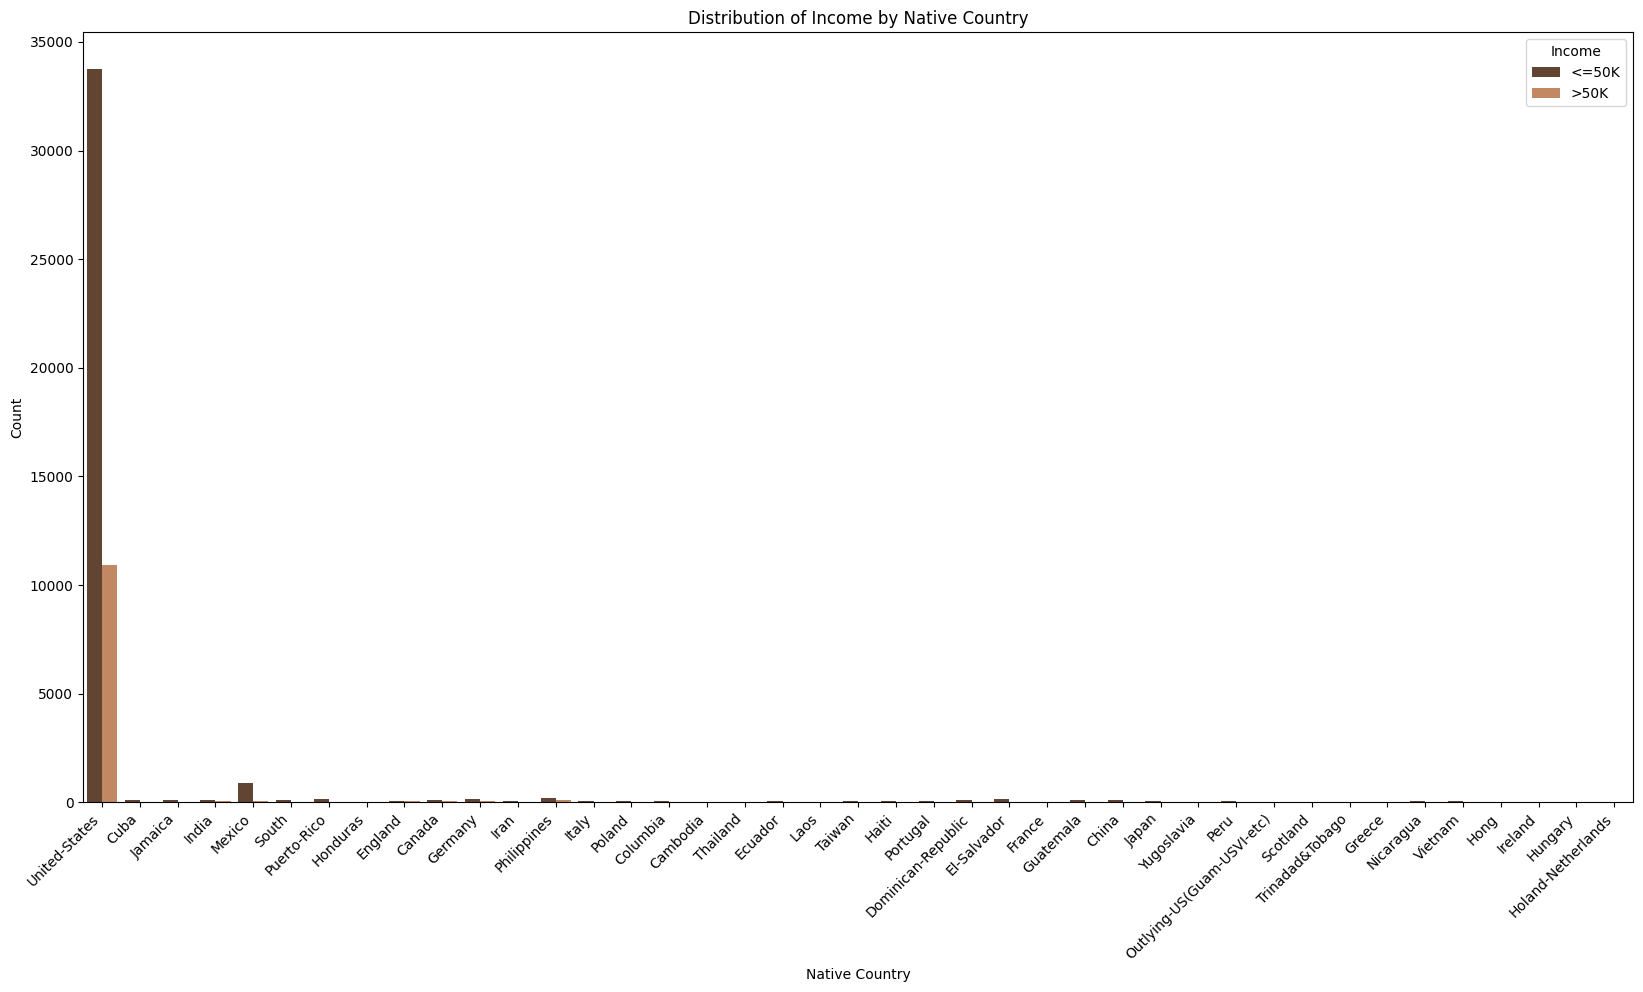

In [54]:
plt.figure(figsize=(20, 10))
sns.countplot(x="native-country", hue="income", data=data,palette='copper')
plt.xlabel("Native Country")
plt.ylabel("Count")
plt.title("Distribution of Income by Native Country")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Income', loc='upper right')
plt.show()


In [55]:
native_country_mapping = {
    'United-States': 0,
    'Mexico': 1,
    'Philippines': 2,
    'Germany': 3,
    'Canada': 4,
    'Puerto-Rico': 5,
    'El-Salvador': 6,
    'India': 7,
    'Cuba': 8,
    'England': 9,
    'Jamaica': 10,
    'South': 11,
    'China': 12,
    'Italy': 13,
    'Dominican-Republic': 14,
    'Vietnam': 15,
    'Guatemala': 16,
    'Japan': 17,
    'Poland': 18,
    'Columbia': 19,
    'Taiwan': 20,
    'Haiti': 21,
    'Iran': 22,
    'Portugal': 23,
    'Nicaragua': 24,
    'Peru': 25,
    'France': 26,
    'Greece': 27,
    'Ecuador': 28,
    'Ireland': 29,
    'Hong': 30,
    'Cambodia': 31,
    'Trinadad&Tobago': 32,
    'Laos': 33,
    'Thailand': 34,
    'Yugoslavia': 35,
    'Outlying-US(Guam-USVI-etc)': 36,
    'Honduras': 37,
    'Hungary': 38,
    'Scotland': 39,
    'Holand-Netherlands': 40
}

In [56]:
data['native-country'] = data['native-country'].map(native_country_mapping)

###Sex

In [57]:
print(data['sex'].value_counts())

Male      32631
Female    16182
Name: sex, dtype: int64


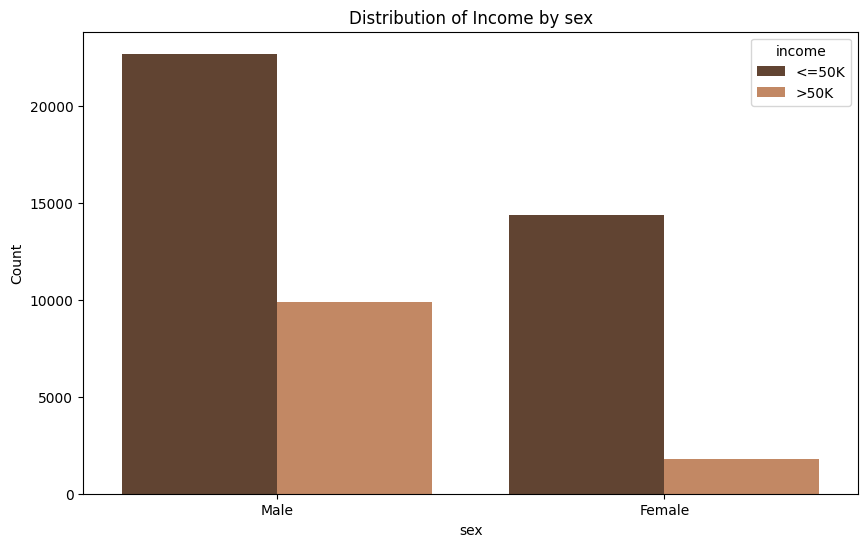

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(x="sex", hue="income", data=data,palette='copper')

plt.xlabel("sex")
plt.ylabel("Count")
plt.title("Distribution of Income by sex")
plt.show()

In [59]:
data['sex']= data['sex'].apply(lambda x:0 if x == 'Male' else 1)
#Male =0 Female =1

###Income

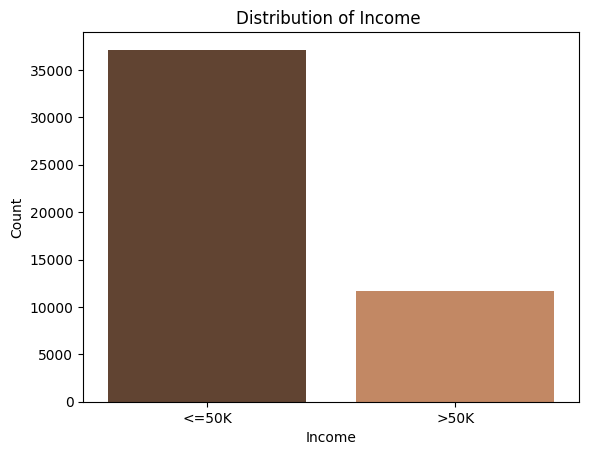

In [60]:
sns.countplot(x='income',hue='income', data=data,palette='copper')
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of Income ")
plt.show()

In [61]:
print(data['income'].value_counts())

<=50K    37128
>50K     11685
Name: income, dtype: int64


In [62]:
data['income']= data['income'].apply(lambda x:0 if x == '<=50K' else 1)
data["income"]

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48813, dtype: int64

In [63]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,4,3,13,1,4,1,0,0,7.684784,0.0,40,0,0
1,50,2,3,13,0,1,0,0,0,0.000000,0.0,13,0,0
2,38,1,1,9,2,8,1,0,0,0.000000,0.0,40,0,0
3,53,1,6,7,0,8,0,1,0,0.000000,0.0,40,0,0
4,28,1,3,13,0,0,4,1,1,0.000000,0.0,40,8,0


##Correlation for all data

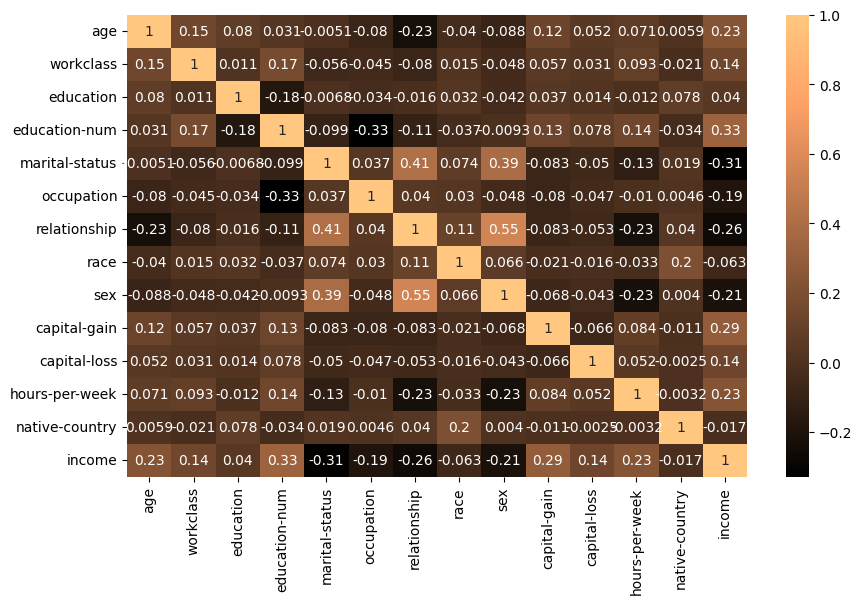

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(),annot=True,cmap='copper')
plt.show()

##Scaling the data

In [65]:
scaler = StandardScaler()
numerical_features = ['age', 'hours-per-week','native-country','education-num','education','occupation']

data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [66]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.025724,4,-0.142272,1.136595,1,0.138924,1,0,0,7.684784,0.0,-0.034304,-0.217005,0
1,0.828125,2,-0.142272,1.136595,0,-0.854188,0,0,0,0.000000,0.0,-2.213335,-0.217005,0
2,-0.047221,1,-0.768320,-0.419685,2,1.463073,1,0,0,0.000000,0.0,-0.034304,-0.217005,0
3,1.046961,1,0.796798,-1.197826,0,1.463073,0,1,0,0.000000,0.0,-0.034304,-0.217005,0
4,-0.776676,1,-0.142272,1.136595,0,-1.185225,4,1,1,0.000000,0.0,-0.034304,1.749467,0


#Model Training

##Train-Test Splitting

In [67]:
smote = SMOTE(random_state=42)
X = data.drop(columns=['income'])
y = data['income']
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Naive Bayes

In [86]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [69]:
y_train_predict = naive_bayes_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_predict)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.7723888493430039


In [70]:
y_test_predict = naive_bayes_model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_predict)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.7705256542622436


###Classification Report

In [71]:
print("Naive Bayes Model :")
print(classification_report(y_test, y_test_predict))

Naive Bayes Model :
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     11222
           1       0.77      0.76      0.77     11055

    accuracy                           0.77     22277
   macro avg       0.77      0.77      0.77     22277
weighted avg       0.77      0.77      0.77     22277



###Confusion Matrix

Naive Bayes Model :


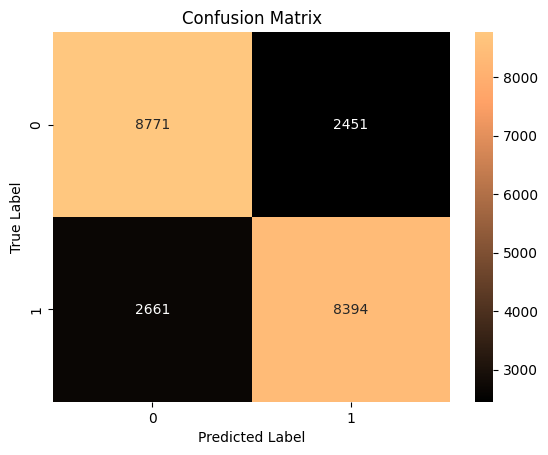

In [72]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
print("Naive Bayes Model :")
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##Random Forest

In [77]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
y_train_predict_rf = random_forest_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_predict)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9812231862867696


In [79]:
y_test_predict = random_forest_model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_test_predict)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.8850832697400907


### Classification Report

In [80]:
print("Random Forest Model :")
print(classification_report(y_test, y_test_predict))

Random Forest Model :
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     11222
           1       0.88      0.89      0.88     11055

    accuracy                           0.89     22277
   macro avg       0.89      0.89      0.89     22277
weighted avg       0.89      0.89      0.89     22277



###Confusion Matrix

Random Forest Model :


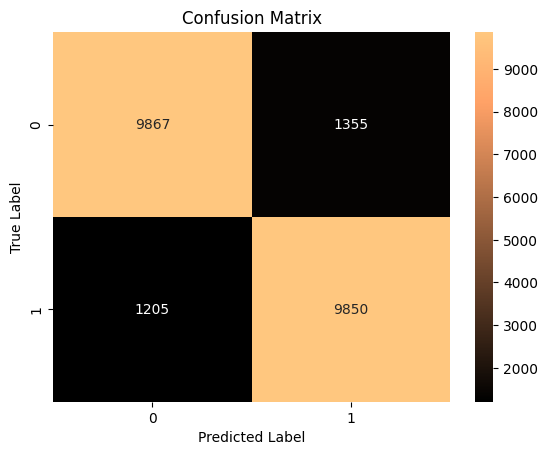

In [81]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
print("Random Forest Model :")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
